# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

!pip install numpy pandas matplotlib seaborn -q --user


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\paluv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
import csv
file = open('foodhub_order.csv')


In [5]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

# Access data in the DataFrame using column names or indexing
print(df["order_id"])
print(df.iloc[:, [0]])

0       1477147
1       1477685
2       1477070
3       1477334
4       1478249
         ...   
1893    1476701
1894    1477421
1895    1477819
1896    1477513
1897    1478056
Name: order_id, Length: 1898, dtype: int64
      order_id
0      1477147
1      1477685
2      1477070
3      1477334
4      1478249
...        ...
1893   1476701
1894   1477421
1895   1477819
1896   1477513
1897   1478056

[1898 rows x 1 columns]


In [6]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
print(f"Total number of rows {df.shape[0]}")
print(f"Total number of columns {df.shape[1]}")

Total number of rows 1898
Total number of columns 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes =='object']

# print(f"Columns not an object: \t {num_vars}")
# print(f"Columns which are object: \t {cat_vars}")
print(df.isnull().sum().sort_values(ascending=True)/len(df))
print(f"Length of data frame:  {len(df)}")



order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64
Length of data frame:  1898


#### Observations:
No missing values in the data frame


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

Minimum value computed: 15
Mean value computed: 24.161749209694417
Maximum value computed: 33


<Axes: >

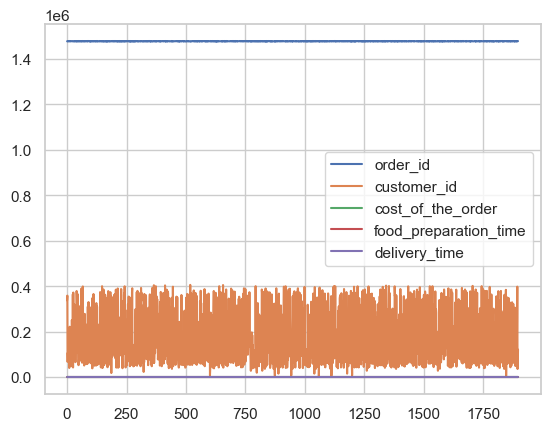

In [45]:
print(f"Minimum value computed: {df['delivery_time'].min()}")
print(f"Mean value computed: {df['delivery_time'].mean()}")
print(f"Maximum value computed: {df['delivery_time'].max()}")
df.plot()


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [41]:
df[df["rating"] == "Not given"]
print((df["rating"] == "Not given").sum())


736


#### Observations:
Total number of not rated orders is 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

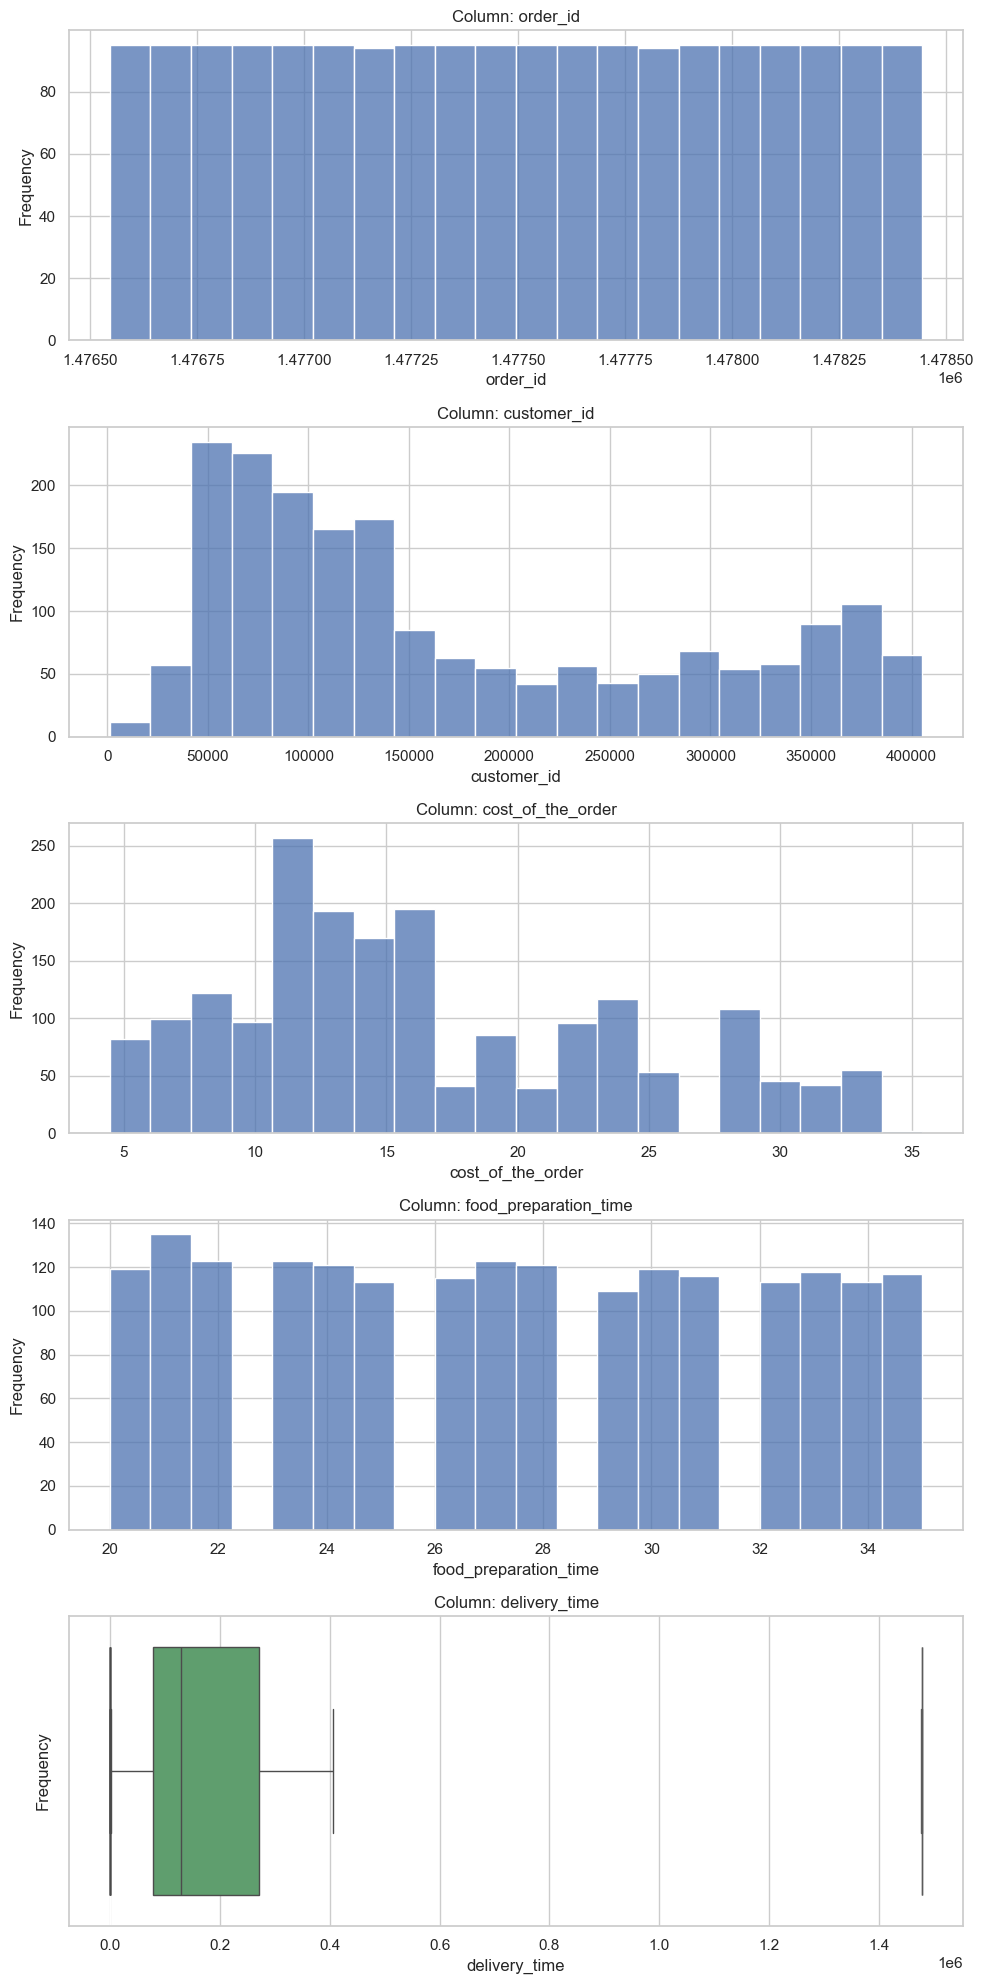

In [42]:
sns.set_theme(style="whitegrid")

#Identify number columns
number_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axs = plt.subplots(len(number_columns), 1, figsize=(10, 20))

#Describe number columns
number_summaries = df[number_columns].describe()

#Enumerate and represent
for i, col in enumerate(number_summaries):
    sns.histplot(df[col], kde=False, ax=axs[i], bins=20)
    axs[i].set_title(f'Column: {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()

for i, col in enumerate(number_summaries):
    sns.boxplot(x=df[col])

plt.tight_layout()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [43]:
df.nlargest(5, 'cost_of_the_order')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
tf = df[df['day_of_the_week'] == 'Weekend']
print(f"Cuisine type most popular in weekend {tf['cuisine_type'].value_counts().head(1)}")
print(f"Cusine type using mode {tf['cuisine_type'].mode()}")

Cuisine type most popular in weekend cuisine_type
American    415
Name: count, dtype: int64
Cusine type using mode 0    American
Name: cuisine_type, dtype: object


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [50]:
mf = df['cost_of_the_order'].sum()
rf = df[df['cost_of_the_order'] > 20]
print(f"Percentage of order cost more than 20$: {rf['cost_of_the_order'].count() *100/df['cost_of_the_order'].count()}")


Percentage of order cost more than 20$: 29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
print(df['delivery_time'].mean())

24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [57]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


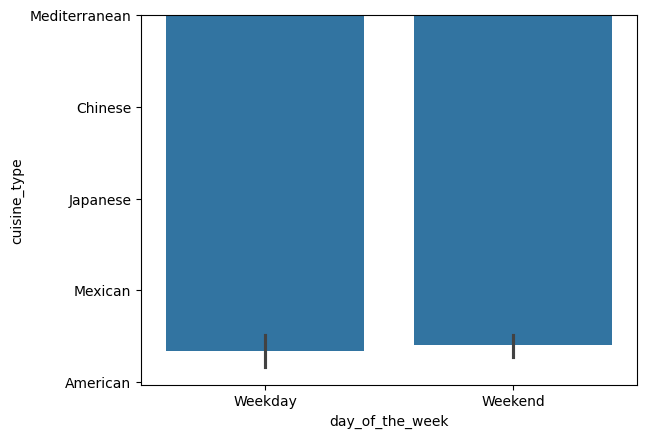

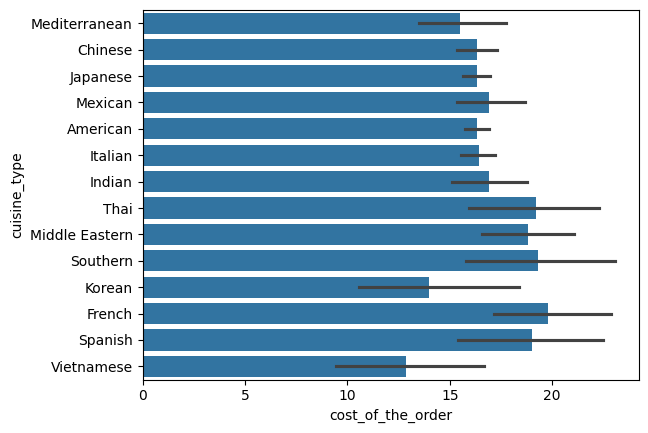

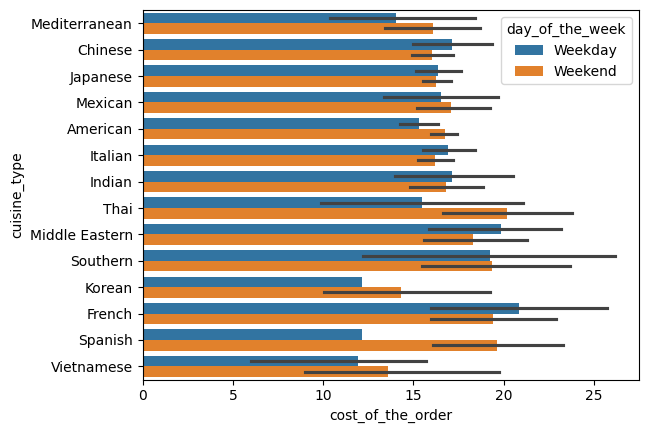

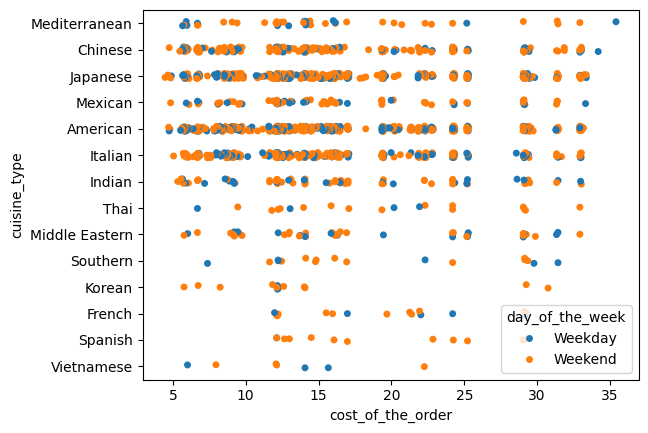

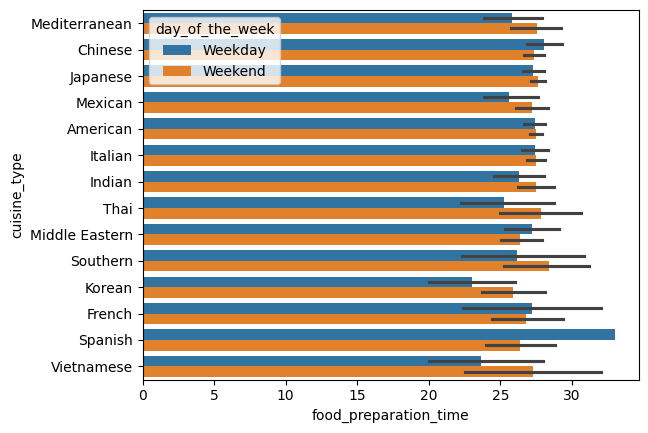

In [100]:
sns.barplot(x = df['day_of_the_week'],y= df['cuisine_type'], data=df)
plt.show()

cos_sort = df.sort_values('cost_of_the_order', ascending = False, inplace = True)
#cos_sort = df.sort_values('cost_of_the_order', ascending = False, inplace = True)

sns.barplot(x = df['cost_of_the_order'],y= df['cuisine_type'], data=df)
plt.show()

sns.barplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.stripplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.barplot(x = df['food_preparation_time'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [121]:
rating_more_than_50 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
rating_more_than_50.reset_index(inplace=True)

df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  



TypeError: agg function failed [how->mean,dtype->object]

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#lamda apply  need to be writtern

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [120]:
df['analysis_prep_time'] = df['food_preparation_time'] + df['delivery_time']
order_values = df['analysis_prep_time'][df['analysis_prep_time'] > 60].count()

print((order_values/df['cost_of_the_order'].count())*100)

10.537407797681771


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---